# HOMEWORK 9

In this homework, you are going to use the dlib face detector and apply it to an image of your liking. You can follow the procedure shown in lesson 9. Please always comment your code so I can see what you're doing :-)

For this homework we are not going to provide you with any code, you'll have to build the face detector on your own.

### Step 0

Run the necessary imports.

In [21]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

### Step 1

Load an image (any image that contains faces).

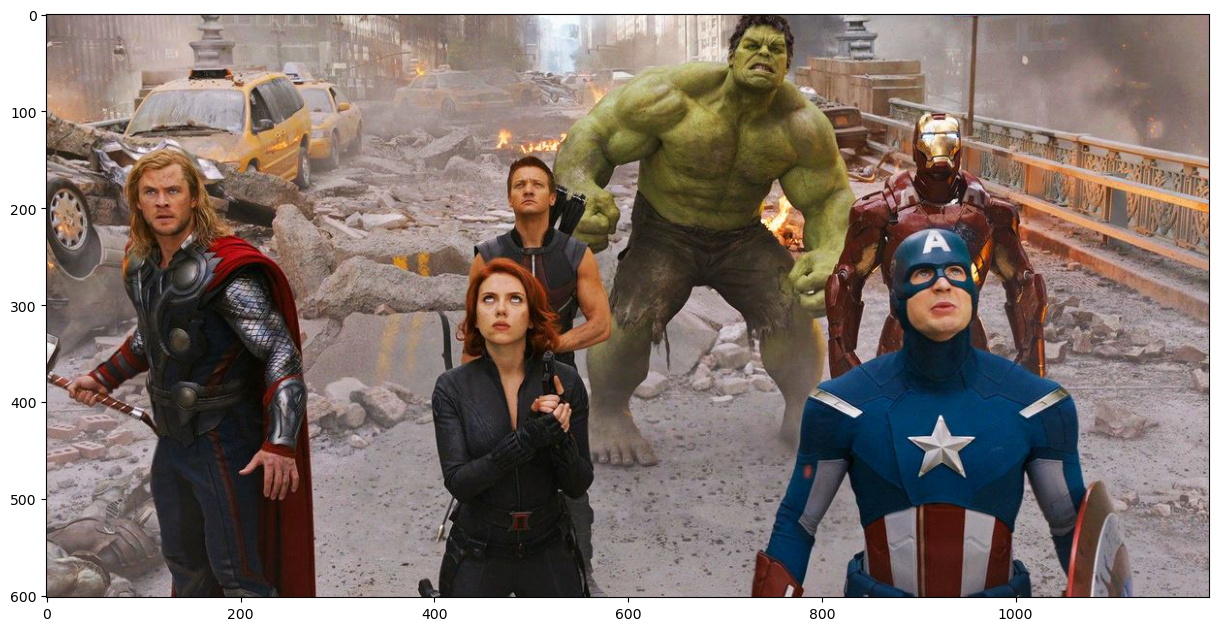

In [22]:
img = cv2.imread('avengers.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img)

### Step 2

Load the dlib face predictor.

In [23]:
import dlib

# Load the dlib face detector
detector = dlib.get_frontal_face_detector()

### Step 3

Run the predictor on your image.

In [24]:
# run dlib detector with upsampling factor 1
rects = detector(gray, 1)

print('Number of detected faces:', len(rects))

Number of detected faces: 5


### Step 4

Draw bounding boxes around the detected faces and plot the image. Use different colour for each face.

87 163 62 62
439 281 62 62
477 166 43 43
709 11 62 62
884 246 75 74


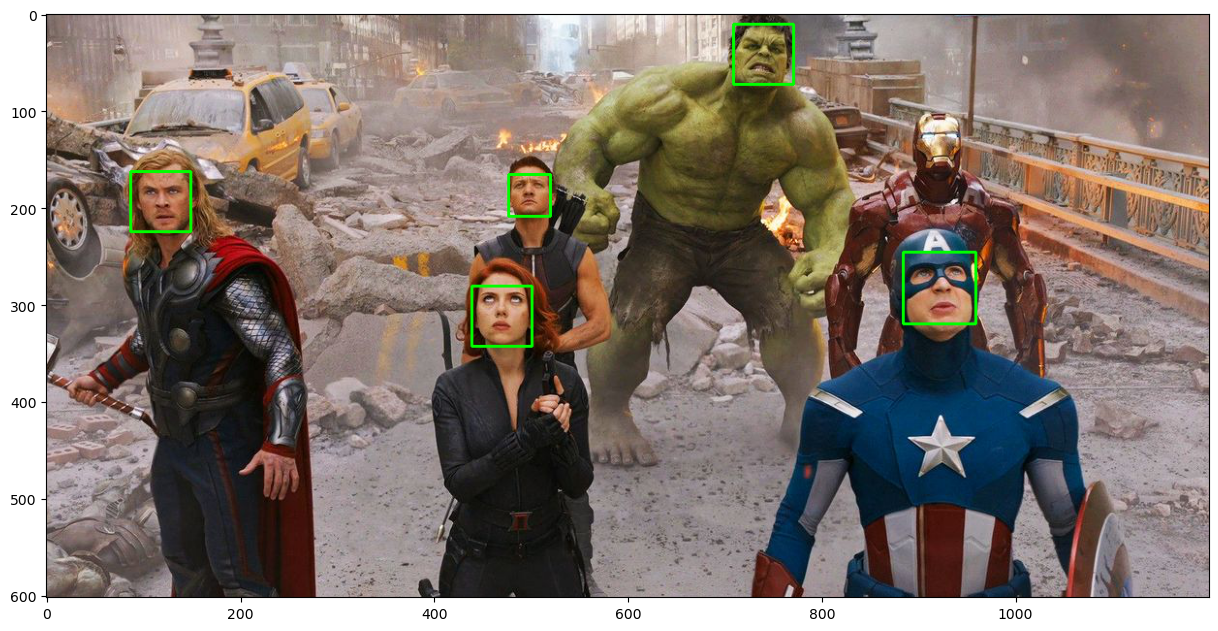

In [25]:
def rect_to_bb(rect):
    # Dlib rect --> OpenCV rect
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y

    return (x, y, w, h)


# Draw rectangle around each face
result_dlib = np.copy(img)
faces_dlib_img = []
for rect in rects:    
    # Draw rectangle around the face
    x, y, w, h = rect_to_bb(rect)
    print(x, y, w, h)
    cv2.rectangle(result_dlib, (x, y), (x+w, y+h), (0, 255, 0), 2)
    faces_dlib_img.append(img[y:y+h, x:x+w, :])

plt.imshow(result_dlib)

### Step 5 (optional)

Repeat the process with a different and more challenging image (more faces, smaller faces, people with glasses, hats, helmets, etc.). How does the detector perform? Is it robust?

Number of detected faces: 4
617 335 32 32
752 171 56 55
151 18 47 47
299 193 80 80


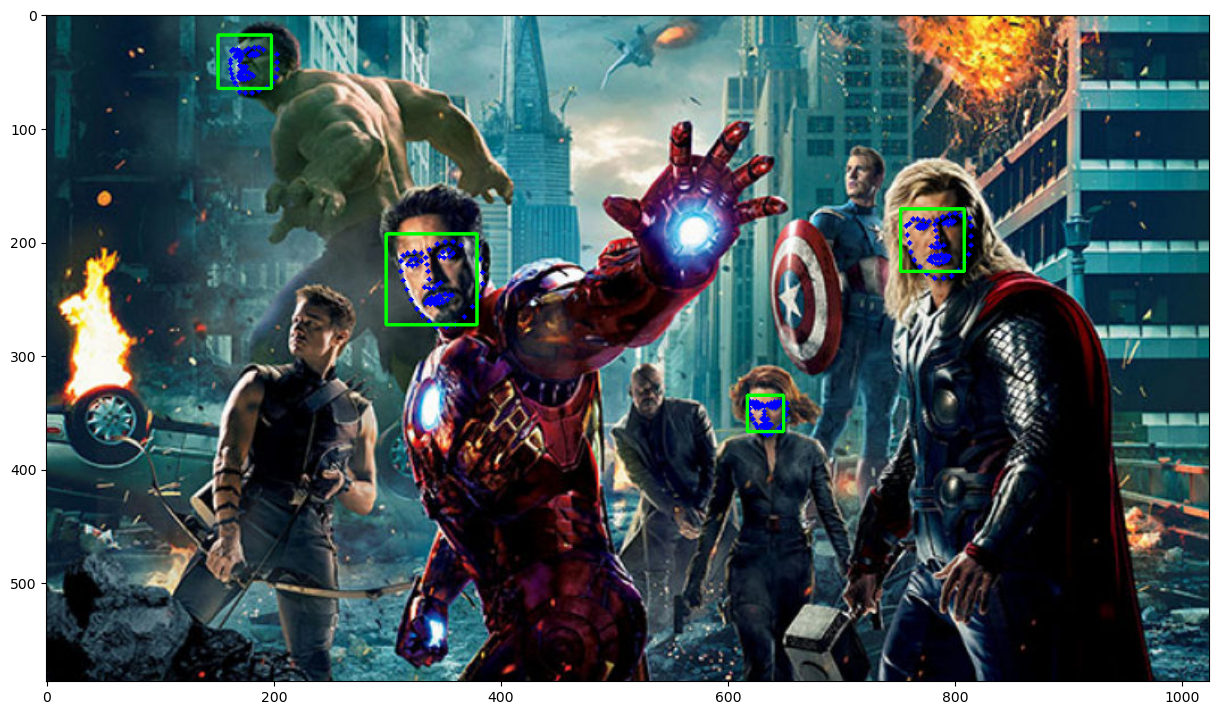

In [26]:
img = cv2.imread('avengers3.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

rects = detector(gray, 3)

#added predictor to visualise face landmarks for better understanding
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

print('Number of detected faces:', len(rects))

# Draw rectangle around each face
result_dlib = np.copy(img)
faces_dlib_img = []
for rect in rects:    
    # Draw rectangle around the face
    x, y, w, h = rect_to_bb(rect)
    print(x, y, w, h)
      # Predict facial landmarks
    shape = predictor(gray, rect)
    # Draw landmarks
    for i in range(68):
        cv2.circle(result_dlib, (shape.part(i).x, shape.part(i).y), 2, (0, 0, 255), -1)
    cv2.rectangle(result_dlib, (x, y), (x+w, y+h), (0, 255, 0), 2)
    faces_dlib_img.append(img[y:y+h, x:x+w, :])

plt.imshow(result_dlib)

### That is interesting; with upsampling factor 3, I have 4 faces detected(+ Hulk's), but with 2 value, there is no Iron Man face detected somehow. Of course, I see how a bigger upsampling value affects computation.